# Bootstrap Aggregating (Bagging)

In [129]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, r2_score, accuracy_score
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import VotingClassifier, BaggingClassifier, BaggingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt


### Kyphosis Dataset

In [3]:
kyp = pd.read_csv("./Cases/Kyphosis/Kyphosis.csv")
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [33]:
X = kyp.drop('Kyphosis', axis=1)
y = kyp['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)


In [34]:
lr = LogisticRegression(penalty='l2')
bagg = BaggingClassifier(estimator=lr, n_estimators=20, random_state=24)
bagg.fit(X_train, y_train)
y_pred = bagg.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='present')}")

F1 Score: 0.5


In [ ]:

svm_l = SVC(kernel='linear')
bagg = BaggingClassifier(estimator=svm_l, n_estimators=20, random_state=24)
bagg.fit(X_train, y_train)
y_pred = bagg.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='present')}")

F1 Score: 0.5714285714285714


In [39]:

svm_r = SVC(kernel='rbf')
bagg = BaggingClassifier(estimator=svm_r, n_estimators=20, random_state=24)
bagg.fit(X_train, y_train)
y_pred = bagg.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='present')}")

F1 Score: 0.0


In [40]:

dtc = DecisionTreeClassifier(random_state=24)
bagg = BaggingClassifier(estimator=dtc, n_estimators=20, random_state=24)
bagg.fit(X_train, y_train)
y_pred = bagg.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='present')}")

F1 Score: 0.5333333333333333


### Sonar Dataset

In [41]:
sonar = pd.read_csv("./Cases/Sonar/Sonar.csv")
sonar.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [42]:
X, y = sonar.drop('Class', axis=1), sonar['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)


In [58]:
lr = LogisticRegression(penalty='l2')
svm_l = SVC(kernel='linear')
svm_r = SVC(kernel='rbf')
dtc = DecisionTreeClassifier(random_state=24)
algos = [lr,svm_l,svm_r,dtc]
for i in algos:
    bagg = BaggingClassifier(estimator=i,n_estimators=20, random_state=24)
    bagg.fit(X_train, y_train)
    y_pred = bagg.predict(X_test)
    print(f"F1 Score {i} : {f1_score(y_test, y_pred, pos_label='R'):.2f}")
    

F1 Score LogisticRegression() : 0.78
F1 Score SVC(kernel='linear') : 0.80
F1 Score SVC() : 0.70
F1 Score DecisionTreeClassifier(random_state=24) : 0.66


### Concrete Strength Dataset

In [59]:
concrete = pd.read_csv("./Cases/Concrete Strength/Concrete_Data.csv")
concrete.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [67]:
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [78]:
lr = LinearRegression()
ridge = Ridge()
elastic = ElasticNet()
dtr = DecisionTreeRegressor(random_state=24)
algos = [lr,ridge,elastic,dtr]
for i in algos:
    bagg = BaggingRegressor(estimator=i,n_estimators=20, random_state=24)
    bagg.fit(X_train, y_train)
    y_pred = bagg.predict(X_test)
    print(f"R2 Score {i} : {r2_score(y_test, y_pred)}")

R2 Score LinearRegression() : 0.5808670357404945
R2 Score Ridge() : 0.5808666823964368
R2 Score ElasticNet() : 0.5804369024058065
R2 Score DecisionTreeRegressor(random_state=24) : 0.887451829923634


## OOB Score

In [79]:
dtr = DecisionTreeRegressor(random_state=24)
bagg = BaggingRegressor(estimator=dtr, n_estimators=20, random_state=24, oob_score=True)
bagg.fit(X_train, y_train)
print("Out of Bag Score: ", bagg.oob_score_)

Out of Bag Score:  0.8828870994868725


## HR Dataset

In [80]:
hr = pd.read_csv("./Cases/human-resources-analytics/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [104]:
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),("passthrough", make_column_selector(dtype_exclude=object)),verbose_feature_names_out=False).set_output(transform='pandas')
X_ohe = ct.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.3, random_state=24, stratify=y)
X_trn_ohe = ct.fit_transform(X_train)
X_tst_ohe = ct.transform(X_test)

In [119]:
max_features = [3,5,6,8,10]
score = []
for i in max_features:
    rfr = RandomForestClassifier(max_features=i , random_state=24)
    rfr.fit(X_trn_ohe, y_train)
    y_pred = rfr.predict(X_tst_ohe)
    print(f"F1 Score for {i} : {f1_score(y_test, y_pred , pos_label=1)}")
    score.append(f1_score(y_test, y_pred , pos_label=1))
   
    

F1 Score for 3 : 0.9723809523809523
F1 Score for 5 : 0.9743101807802094
F1 Score for 6 : 0.9771863117870723
F1 Score for 8 : 0.9747979077508322
F1 Score for 10 : 0.9753320683111955


In [120]:
i_max = np.argmax(score)
print("Best feature: ", max_features[i_max])
print("Best Score: ", score[i_max])

Best feature:  6
Best Score:  0.9771863117870723


In [121]:
bm = RandomForestClassifier(max_features=6, random_state=24)
X_ohe = ct.fit_transform(X)
bm.fit(X_ohe, y)


RandomForestClassifier(max_features=6, random_state=24)

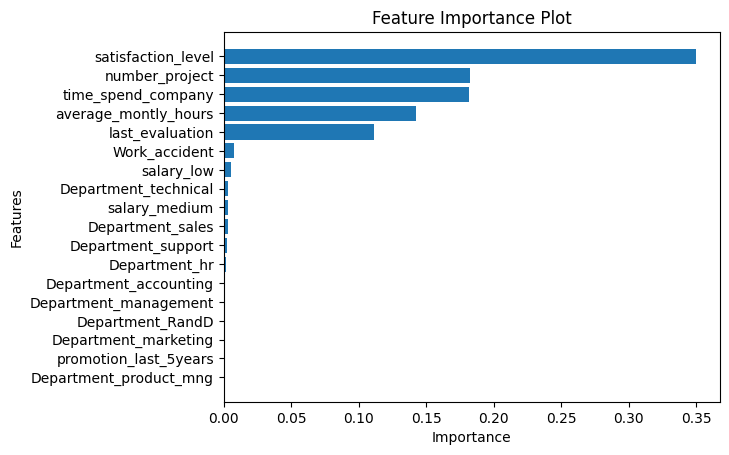

In [134]:
df_imp = pd.DataFrame({'Importance':bm.feature_importances_,'Column':list(X_ohe.columns)})
df_imp.sort_values('Importance', ascending=True, inplace=True)

plt.barh(df_imp['Column'], df_imp['Importance'])
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()